<a href="https://colab.research.google.com/github/Tanvir19934/Colab-notebooks/blob/main/03_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision libaries in PyTorch
`torchvision` - base domain library for PyTorch computer vision.

`torchvision.datasets` - get datasets and data loading functions for computer vision here.

`torchvision.models` - get pretrained computer vision models that you can leverage for your own problems.

`torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model.

`torch.utils.data.Dataset` - base dataset class for PyTorch.

`torch.utils.data.DataLoader` - creates a Python iterable over a dataset

**A very very useful article on CNN:**
**https://cs231n.github.io/convolutional-networks/**

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


#Visualizing data

In [ ]:
print(len(train_data), len(test_data))
class_names = train_data.classes
print(class_names)
class_to_idx = train_data.class_to_idx
print(class_to_idx)

60000 10000
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

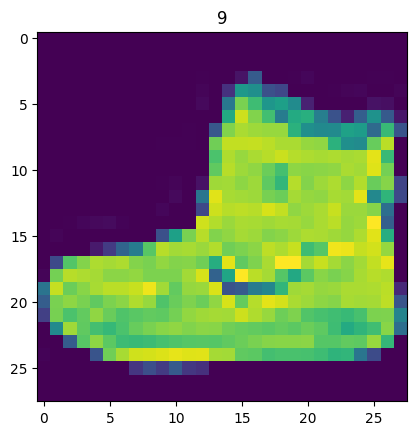

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
image.reshape(28,28,1)
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

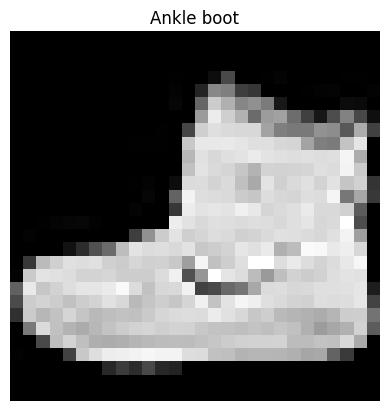

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

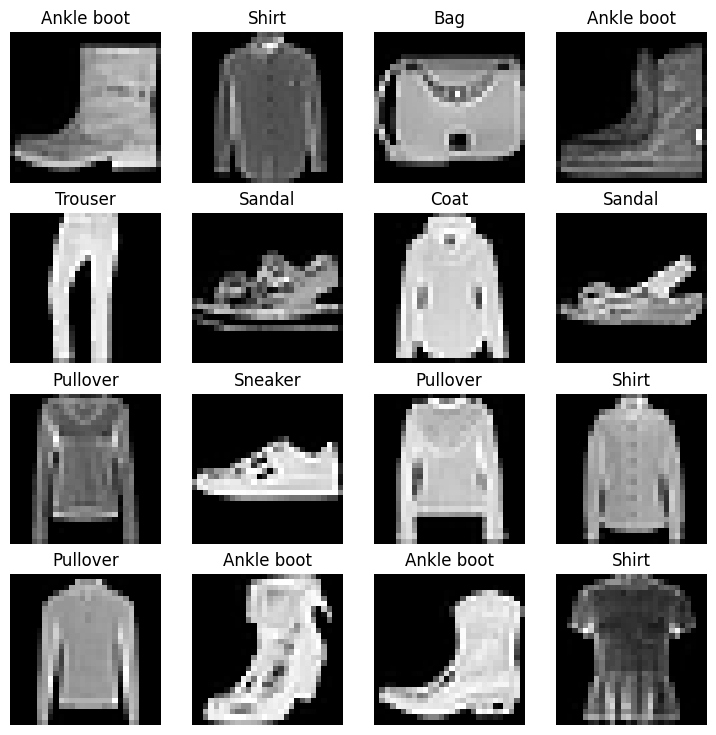

In [ ]:
# Plot some more random images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

# Prepare DataLoader
Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
It gives our neural network more chances to update its gradients per epoch.
for more on minibatches see: https://www.youtube.com/watch?v=4qJaSmvhxi8

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) #shuffling does not matter on test data. not shuffling test data is preferred for ease of comparison

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb630d7f1f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb61378ada0>)

In [ ]:
# Let's check out what what we've created
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")
# Check out what's inside the training dataloader
print(type(next(iter(train_dataloader))))
print(len(next(iter(train_dataloader))))
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...
<class 'list'>
2


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


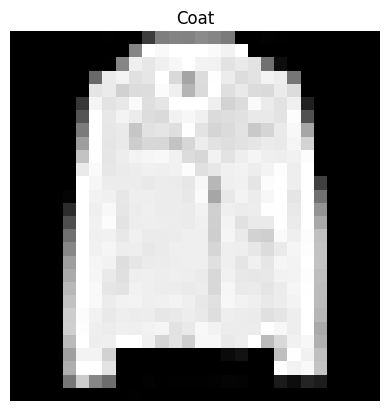

In [ ]:
# Show a single sample image
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# Model 0: Build a basline model
When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

More info on flatten layer: https://www.educative.io/answers/what-is-a-neural-network-flatten-layer

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
    ## Initialize the weights and biases of the last layer to zero. See details: https://www.youtube.com/watch?v=P6sfmUTpUmc&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=4 around 10 mins
    ## This is often done. Instead of initializing randomly, we initialize to zero
    ## to make the initial logits uniform. Initialize the weights to 0.01 and biases to 0
    #with torch.no_grad():
    #    b = 1 # b =1 means we keep torch's random initialization as is
    #    self.layer_stack[-1].weight *= b
    #    self.layer1.stack[-1] = 0


  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28, # this is 28*28
    hidden_units=10, # how mnay units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
#print(model_0(dummy_x))
print(model_0(dummy_x).shape)
dummy_x = torch.rand([2, 1, 28, 28])
#print(model_0(dummy_x))
print(model_0(dummy_x).shape)

torch.Size([1, 10])
torch.Size([2, 10])


In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item() # or (y_true==y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

# Creating a training loop and training a model on batches of data
Loop through epochs.
Loop through training batches, perform training steps, calculate the train loss per batch.
Loop through testing batches, perform testing steps, calculate the test loss per batch.

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):  #how do i know the shape of train_dataloader and properly iterate? see below
  #actually you dont need enumerate as you are not using batch anywhere in the code. just for X, y in train_dataloader is enough.

    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 30.627 seconds


# Understanding the dimension of `train_dataloader`

In [ ]:
# Inspect the structure of a batch
print(f"total number of batches: {len(list(train_dataloader))}")
for batch in train_dataloader:
    print(f"Batch type: {type(batch)}")
    print(f"Batch length: {len(batch)}") #this indicates a single batch consists of 2 parts
    print(f"Batch content: {batch[1]}") #visualize the second part. as youll see its the target y. similarly batch[0] is the X.
    break  # Only inspect the first batch

total number of batches: 1875
Batch type: <class 'list'>
Batch length: 2
Batch content: tensor([3, 7, 6, 4, 9, 7, 1, 4, 4, 4, 5, 9, 3, 7, 9, 9, 8, 6, 9, 6, 6, 6, 8, 4,
        4, 3, 6, 4, 4, 8, 0, 0])


In [ ]:
for batch in train_dataloader:
    data, targets = batch  # unpack the batch
    print(f"Data shape: {data.shape}, Targets shape: {targets.shape}")
    break
i = 0
for batch, (X, y) in enumerate(train_dataloader): #important: batch is the index of the batch. you know each batch consists of two parts from above
    i = i+1
    if i==18:
        print(f"batch no: {batch}")
        print(X.shape)
        print(y)
        break

Data shape: torch.Size([32, 1, 28, 28]), Targets shape: torch.Size([32])
batch no: 17
torch.Size([32, 1, 28, 28])
tensor([1, 5, 4, 7, 9, 8, 4, 4, 0, 6, 1, 3, 3, 8, 2, 3, 1, 0, 7, 8, 4, 8, 2, 8,
        4, 0, 0, 3, 1, 5, 0, 7])


# Start building model_1

We will train this model on gpu with nonlinearity to improve over `model_0` which used cpu and used linear layers

In [ ]:
# Setup device-agnostic code
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
    #self.initialize_weights() #this works too

    ## Initialize the weights and biases of layers that go into ReLu in such a way
    ## that they always feed positive values to ReLu to ensure ReLu does not squash
    ## them to zero. It ensures that neurons are always "firing" because otherwise,
    ## it becomes flat and gradient becomes zero. See details: https://www.youtube.com/watch?v=P6sfmUTpUmc&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=4 around 10 mins

  def initialize_weights(self):
        # Initialize weights and biases to be positive
        for module in self.layer_stack.modules():
            if isinstance(module, nn.Linear):
                nn.init.constant_(module.bias, 1.0)  # Initialize bias to be positive
                module.weight.data.abs_()  # Make weights positive


  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to the GPU if it's available
next(model_1.parameters()).device
model_1.initialize_weights()
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr=0.1)

# Functionalizing training and evaluation/testing loops


In [ ]:
# Training step function
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0
  model.to(device)
  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for X, y in data_loader:
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model.forward(X).squeeze() #y_pred = model.forward(X) also works

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y, y_pred=torch.softmax(y_pred, dim=1).argmax(dim=1)) # go from logits -> pred prob -> prediction labels
    # we could exclude softmax. see https://github.com/mrdbourke/pytorch-deep-learning/discussions/314. in short The softmax function does not change the relative ordering of the logits.
    #The index of the highest logit value before applying softmax remains the index of the highest probability after applying softmax. Thus, applying softmax before argmax is redundant.

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")
  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": train_loss.item(),
          "model_acc": train_acc}

In [ ]:
# Testing step function
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0
  model.to(device)
  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculuate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": test_loss.item(),
          "model_acc": test_acc}

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  model_1_train_results = train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  model_1_test_results = test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  model_0_train_results = train_step(model=model_0,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  model_0_test_results = test_step(model=model_0,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)
print(model_0_train_results)
print(model_0_test_results)
print(model_1_train_results)
print(model_1_test_results)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 0.62975 | Train acc: 77.54%
Test loss: 0.50000 | Test acc: 82.22%

Train loss: 0.43026 | Train acc: 84.94%
Test loss: 0.47664 | Test acc: 83.43%

Epoch: 1
----------
Train loss: 0.47394 | Train acc: 82.94%
Test loss: 0.50257 | Test acc: 81.87%

Train loss: 0.43026 | Train acc: 84.94%
Test loss: 0.47664 | Test acc: 83.43%

Epoch: 2
----------
Train loss: 0.44678 | Train acc: 83.81%
Test loss: 0.50539 | Test acc: 81.77%

Train loss: 0.43026 | Train acc: 84.94%
Test loss: 0.47664 | Test acc: 83.43%

Train time on cuda: 68.648 seconds
{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.4302614629268646, 'model_acc': 84.94166666666666}
{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.44678282737731934, 'model_acc': 83.80833333333334}
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.5053927898406982, 'model_acc': 81.76916932907348}


Note: Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.

Why is this?

It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
The hardware you're using has a better CPU in terms compute capability than the GPU.
For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

# CNN

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels=input_shape, #input_shape is the number of color channels. if it was RGB, it would be 3.
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculating this...: https://www.youtube.com/watch?v=V_xro1bcAuA 18:19:40
                  # change 7*7 to arbitrary values to deliberaretly get an error, uncomment the print statements below, and work
                  #through the error to determine the proper number to multiply with hidden_units in this Linear layer
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}") # these print statements help troubleshoot finding the proper hapes in nn.Linear in the final layer
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}") # these print statements help troubleshoot finding the proper hapes in nn.Linear in the final layer
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")   # these print statements help troubleshoot finding the proper hapes in nn.Linear in the final layer
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, #input_shape is the number of color channels. if it was RGB, it would be 3.
                              hidden_units=10, #number of filters
                              output_shape=len(class_names)).to(device)
model_2 = torch.compile(model_2) #for faster training

# Troubleshooting the proper shape of output in the final layer


In [ ]:
#troubleshooting the proper shape of output in the final layer
torch.manual_seed(42)
# create a random image
rand_image_tensor = torch.randn(size=(1, 28, 28))
print(rand_image_tensor.shape)

# Pass the data through the convolutional layer
model_2(rand_image_tensor.unsqueeze(0).to(device))


torch.Size([1, 28, 28])


tensor([[ 0.0505, -0.0729,  0.0821, -0.0451, -0.0044,  0.0383,  0.0061, -0.0016,
         -0.0127, -0.0081]], device='cuda:0',
       grad_fn=<CompiledFunctionBackward>)

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  model_2_train_results = train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  model_2_test_results = test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.59423 | Train acc: 78.42%
Test loss: 0.41183 | Test acc: 85.14%

Epoch: 1
-------
Train loss: 0.36573 | Train acc: 86.83%
Test loss: 0.35570 | Test acc: 86.63%

Epoch: 2
-------
Train loss: 0.32807 | Train acc: 88.10%
Test loss: 0.32094 | Test acc: 88.52%

Train time on cuda: 43.717 seconds


In [ ]:
import pandas as pd
compare_train_results = pd.DataFrame([model_0_train_results,
                                model_1_train_results,
                                model_2_train_results])
compare_train_results['training_time'] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
print(compare_train_results)
print('\n')
compare_test_results = pd.DataFrame([model_0_test_results,
                                model_1_test_results,
                                model_2_test_results])
print(compare_test_results)

            model_name  model_loss  model_acc  training_time
0  FashionMNISTModelV0    0.430261  84.941667      26.897694
1  FashionMNISTModelV1    1.858301  30.823333      62.656241
2      OptimizedModule    0.328070  88.101667      43.717451


            model_name  model_loss  model_acc
0  FashionMNISTModelV0    0.476639  83.426518
1  FashionMNISTModelV1    1.843536  33.037141
2      OptimizedModule    0.320940  88.518371


# Make and evaluate random predictions with best model


In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob)

  #print(pred_probs)

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=16): #test_data contains images, test_dataloader contains batches of images
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

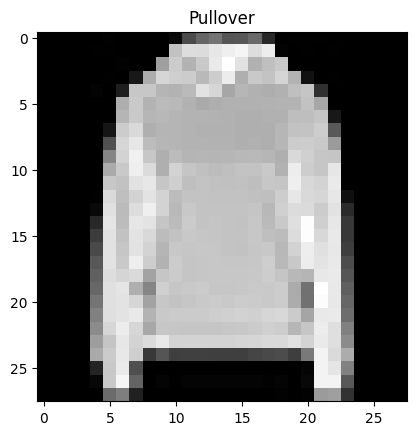

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[3.4676e-04, 1.3800e-05, 5.7120e-02, 1.9186e-05, 9.3924e-01, 3.2533e-07,
         3.1892e-03, 2.4373e-06, 6.6394e-05, 2.9011e-06],
        [1.4786e-05, 2.3747e-06, 9.7883e-06, 5.1683e-06, 1.6106e-06, 4.2857e-03,
         1.2682e-05, 6.9176e-03, 8.2842e-04, 9.8792e-01]], device='cuda:0')

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 9, 3, 6, 3, 9, 1, 9, 6, 6, 0, 9, 7, 5, 3, 0], device='cuda:0')

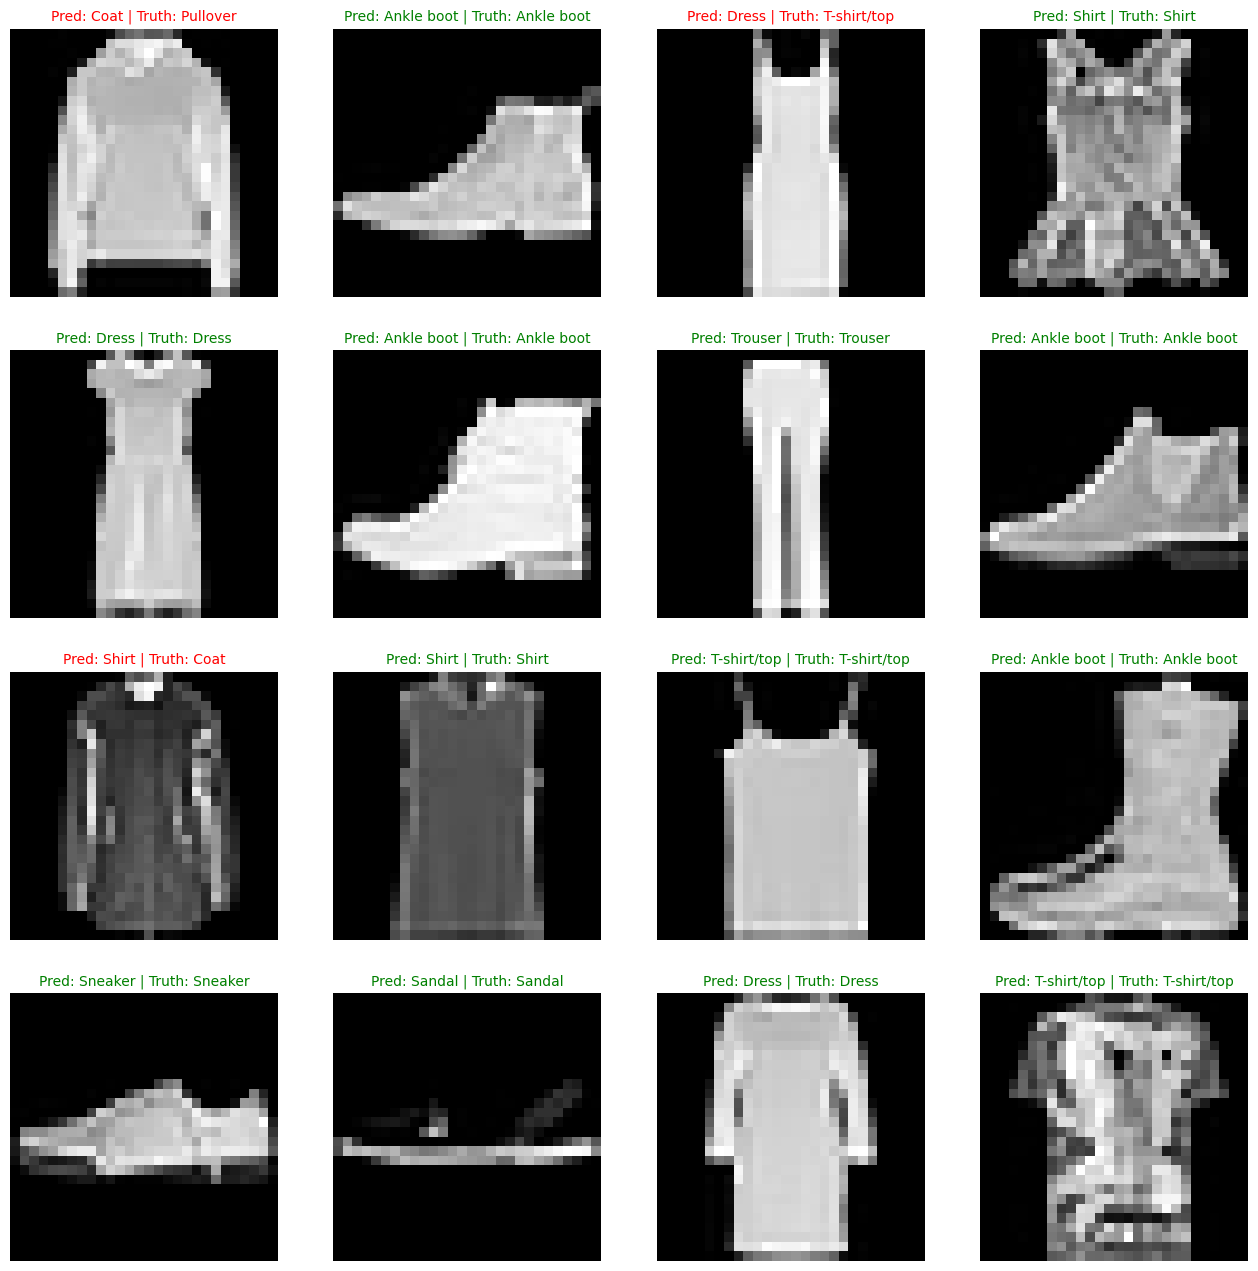

In [ ]:
# Plot predictions
plt.figure(figsize=(16, 16))
nrows = 4
ncols = 4
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

# Making a confusion matrix for further prediction evaluation


In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [ ]:
import mlxtend
try:
    import torchmetrics
except:
    !pip install torchmetrics

In [ ]:
print(class_names)
print(y_pred_tensor[:10])
print(test_data.targets)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])
tensor([9, 2, 1,  ..., 8, 1, 5])


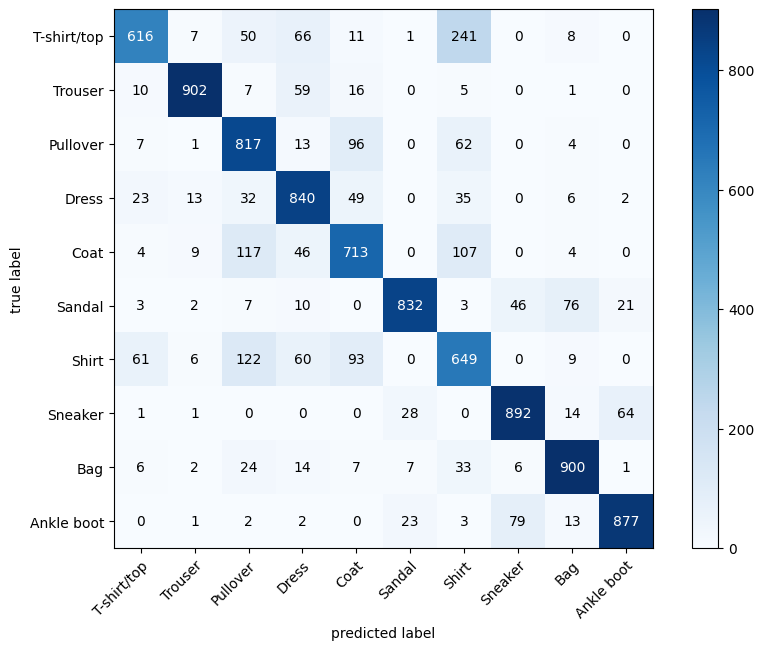

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7),
    colorbar=True
)

# Save and load best performing model


In [ ]:
#Saving
# Recall that saving the whole model is not recommended, so we will save only the model parameters (state_dict)
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Loading
# Create a new instance, because we only saved the model state dict, we need a new instance when loading the model
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

RuntimeError: Error(s) in loading state_dict for FashionMNISTModelV2:
	Missing key(s) in state_dict: "conv_block_1.0.weight", "conv_block_1.0.bias", "conv_block_1.2.weight", "conv_block_1.2.bias", "conv_block_2.0.weight", "conv_block_2.0.bias", "conv_block_2.2.weight", "conv_block_2.2.bias", "classifier.1.weight", "classifier.1.bias". 
	Unexpected key(s) in state_dict: "_orig_mod.conv_block_1.0.weight", "_orig_mod.conv_block_1.0.bias", "_orig_mod.conv_block_1.2.weight", "_orig_mod.conv_block_1.2.bias", "_orig_mod.conv_block_2.0.weight", "_orig_mod.conv_block_2.0.bias", "_orig_mod.conv_block_2.2.weight", "_orig_mod.conv_block_2.2.bias", "_orig_mod.classifier.1.weight", "_orig_mod.classifier.1.bias". 

In [ ]:
# Function for predicting testing points with a trained model
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
loaded_model_2_results = eval_model(model=loaded_model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

In [ ]:
print(loaded_model_2_results,'\n', model_2_test_results)

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_test_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)